# 텍스트 유사도

## p.118

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [8]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) # 문장 벡터화 진행
# tfidf_matrix = tfidf_vectorizer.fit_transform([sent])

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf))) # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


---


In [13]:
# 1. 자카드 유사도
# ----------------
sent_1 = set(sent[0].split())
sent_2 = set(sent[1].split())
print(sent_1)
print(sent_2)
# 합집합과 교집합을 구한다.
hap_set = sent_1 | sent_2
gyo_set = sent_1 & sent_2
print()
print(hap_set, '\n')
print(gyo_set, '\n')

jaccard = len(gyo_set) / len(hap_set)
print(jaccard)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent).toarray()
print(np.round(tfidf_matrix, 3))

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf))) # 각 수치에 대한 값 시각화

{'오늘', '소식', '은', '이', '폭염', '이어졌는데요,', '인', '반가운', '비', '을', '있습니다.', '서쪽', '으로', '중심', '내일', '도', '휴일'}
{'피해서', '로', '폭염', '망연자실', '갑작스런', '비', '을', '놀러왔다가', '인해', '에', '하고', '있습니다.', '휴일'}

{'소식', '은', '이', '인', '갑작스런', '비', '놀러왔다가', '이어졌는데요,', '서쪽', '으로', '중심', '도', '내일', '오늘', '피해서', '로', '폭염', '망연자실', '을', '인해', '있습니다.', '에', '하고', '반가운', '휴일'} 

{'폭염', '비', '을', '있습니다.', '휴일'} 

0.2
[[0.    0.324 0.    0.    0.324 0.324 0.324 0.324 0.324 0.324 0.    0.231
  0.324 0.231 0.    0.    0.231]
 [0.365 0.    0.365 0.365 0.    0.    0.    0.    0.    0.    0.365 0.259
  0.    0.259 0.365 0.365 0.259]]
{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.40546510

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# 2. 코사인 유사도
# ---------------
from sklearn.metrics.pairwise import cosine_similarity

d = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(d)

[[0.17952266]]


In [15]:
# 3. 유클리디안 유사도
# -------------------
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

In [16]:
# 정규화
def l1_normalize(v):
    return v / np.sum(v)

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

In [17]:
# 4. 맨하탄 유사도
# ---------------
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

---
# p. ~156
## popcorn


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
# 학습 데이터를 읽어온다.
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, sep='\t', quoting=3)
train_data.head()
# train_data.shape

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [26]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [27]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0


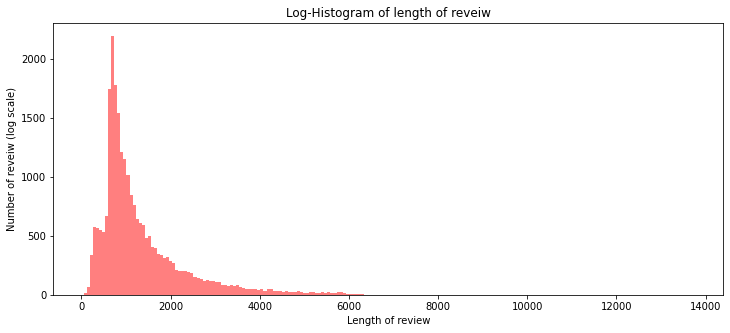

In [28]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
# plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of reveiw')
plt.xlabel('Length of review')
plt.ylabel('Number of reveiw (log scale)')

print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


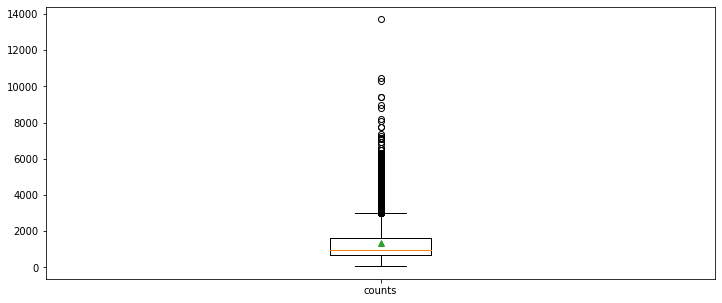

In [29]:
# 사분위에 대한 경우는 0~100 스케일돼 있음.
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

(-0.5, 799.5, 599.5, -0.5)

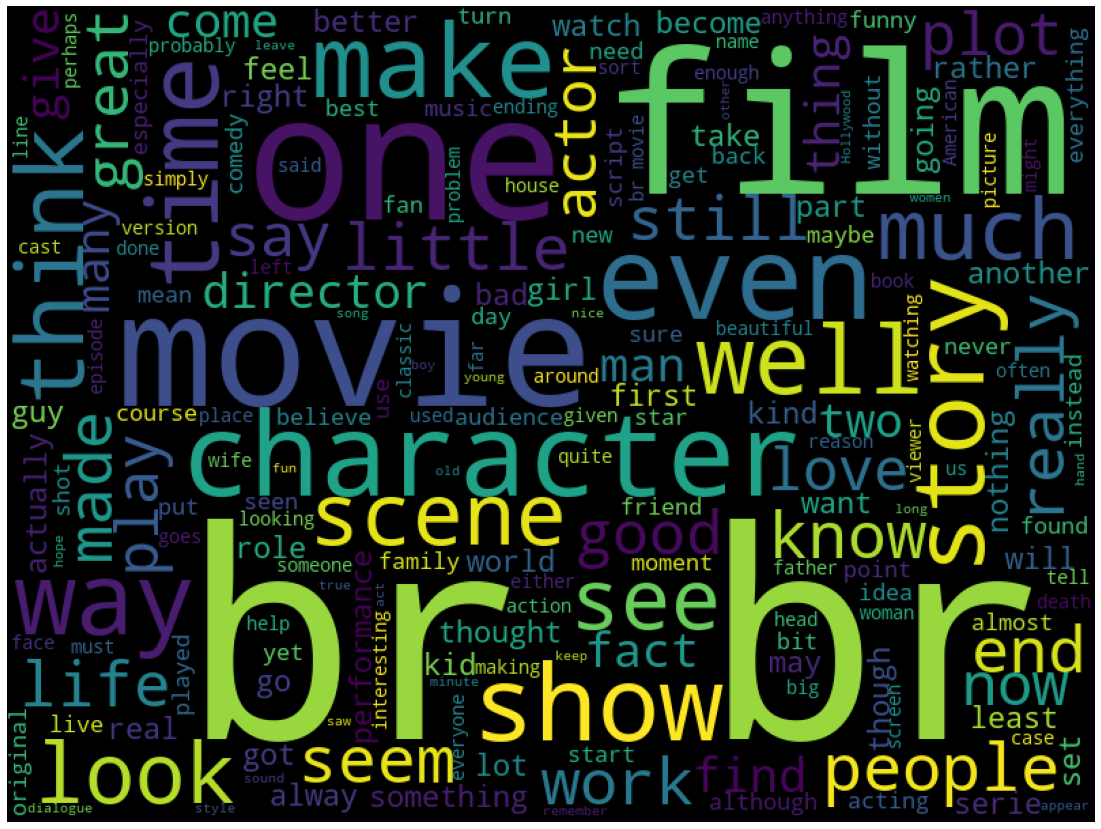

In [30]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


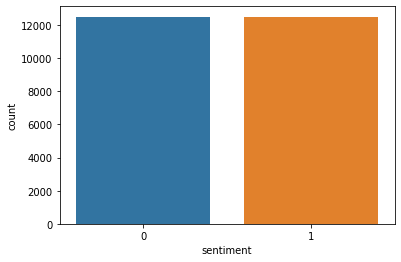

In [31]:
fig, axe = plt.subplots(ncols=1)
# fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])
plt.show()

In [32]:
print(train_data['sentiment'].value_counts())
print("\n긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

1    12500
0    12500
Name: sentiment, dtype: int64

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


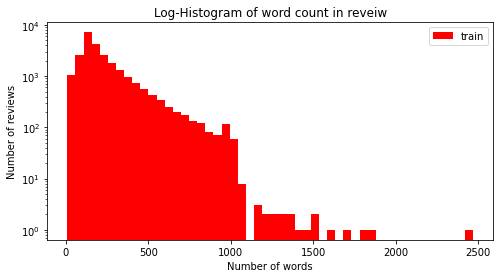

In [44]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(8, 4))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in reveiw')
# plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()

In [34]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

# 사분위에 대한 경우는 0~100 스케일돼 있음.
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


In [35]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가 있는 리뷰: {:.2f}'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}'.format(fullstop * 100))
print('첫 글자가 대문자인 리뷰: {:.2f}'.format(capital_first * 100))
print('대문자가 있는 리뷰: {:.2f}'.format(capitals * 100))
print('숫자가 있는 리뷰: {:.2f}'.format(numbers * 100))

물음표가 있는 리뷰: 29.55
마침표가 있는 리뷰: 99.69
첫 글자가 대문자인 리뷰: 0.00
대문자가 있는 리뷰: 99.59
숫자가 있는 리뷰: 56.66


---
# p.157

In [41]:
import re
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [42]:
# 학습 데이터를 읽어온다.
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, sep='\t', quoting=3)
train_data.head()
# train_data.shape

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [43]:
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

## 전처리

In [47]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.stem import PorterStemmer
import pickle
import numpy as np

In [48]:
nltk.download('punkt')
nltk.download('stopwords')

# 학습 데이터를 읽어온다.
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, sep='\t', quoting=3)
train_data['review'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [49]:
# Pre-processing
stemmer = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

clean_text = []
for review in train_data['review']:
    # 1. 영문자와 숫자만 사용한다. 그 이외의 문자는 공백 문자로 대체한다.
    review = review.replace('<br />', ' ')       # <br> --> space
    review = review.replace('\'', '')            # dont't --> dont
    review = re.sub("[^a-zA-Z]", ' ', review)    # 영문자만 사용

    tmp = []
    for word in nltk.word_tokenize(review):
        # 2. 불용어 처리
        # 'e.g' 같은 경우는 'e g'로 처리된 상태임. 한글자 짜리 word는 버림.
        if len(word.lower()) > 1 and word.lower() not in stopwords:
            # 3. Stemming
            tmp.append(stemmer.stem(word.lower()))
    clean_text.append(' '.join(tmp))

clean_text[0]

'stuff go moment mj ive start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad mkay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl 

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_text)
text_sequences = tokenizer.texts_to_sequences(clean_text)

print(text_sequences[0])

[476, 24, 176, 6918, 127, 89, 900, 87, 11, 807, 517, 11, 12921, 11, 7871, 210, 49, 9, 743, 1521, 81, 101, 15, 569, 3002, 210, 7, 209, 667, 2200, 911, 7871, 63, 3570, 63, 293, 2, 261, 24, 10, 365, 92, 287, 1198, 590, 6918, 62, 622, 2120, 26, 520, 590, 735, 23, 31100, 526, 394, 197, 417, 1447, 838, 1405, 4, 6918, 459, 24, 436, 61, 193, 125, 174, 6918, 7728, 8404, 7, 1, 6918, 128, 14, 38, 34, 128, 212, 15, 216, 68, 293, 2, 129, 143, 89, 104, 7297, 2931, 1013, 352, 825, 7729, 559, 3604, 280, 735, 1350, 49, 6918, 300, 23, 660, 6918, 15879, 674, 10065, 825, 7729, 8, 3806, 49, 22, 37, 3060, 735, 464, 8596, 210, 436, 6918, 87, 71, 569, 35, 4, 6918, 97, 385, 1353, 151, 1593, 1181, 352, 26, 65, 139, 4126, 3191, 341, 2, 4832, 23, 352, 282, 65, 436, 40, 3, 144, 172, 521, 151, 694, 60, 997, 410, 17, 1199, 121, 1, 22, 4, 6918, 3, 465, 82, 29, 22, 450, 177, 54, 57, 5578, 590, 1256, 6918, 25248, 1384, 1, 91, 417, 1447, 324, 3, 317, 22, 56, 1224, 1022, 2200, 16, 604, 127, 463, 606, 5579, 16, 33, 37, 22

In [51]:
word2idx = tokenizer.word_index   # idx는 1부터 부여됨.
word2idx["<PAD>"] = 0
print(word2idx)

{'movi': 1, 'film': 2, 'one': 3, 'like': 4, 'time': 5, 'good': 6, 'make': 7, 'charact': 8, 'get': 9, 'see': 10, 'watch': 11, 'stori': 12, 'even': 13, 'would': 14, 'realli': 15, 'well': 16, 'scene': 17, 'look': 18, 'show': 19, 'much': 20, 'end': 21, 'peopl': 22, 'bad': 23, 'go': 24, 'great': 25, 'also': 26, 'first': 27, 'love': 28, 'think': 29, 'way': 30, 'act': 31, 'play': 32, 'dont': 33, 'made': 34, 'thing': 35, 'could': 36, 'know': 37, 'say': 38, 'seem': 39, 'work': 40, 'plot': 41, 'two': 42, 'year': 43, 'actor': 44, 'come': 45, 'mani': 46, 'seen': 47, 'take': 48, 'want': 49, 'life': 50, 'never': 51, 'littl': 52, 'best': 53, 'tri': 54, 'man': 55, 'ever': 56, 'give': 57, 'better': 58, 'still': 59, 'perform': 60, 'find': 61, 'feel': 62, 'part': 63, 'back': 64, 'director': 65, 'use': 66, 'someth': 67, 'actual': 68, 'interest': 69, 'im': 70, 'lot': 71, 'real': 72, 'old': 73, 'cast': 74, 'though': 75, 'doesnt': 76, 'live': 77, 'star': 78, 'didnt': 79, 'enjoy': 80, 'guy': 81, 'anoth': 82, 

In [52]:
print("전체 단어 개수:", len(word2idx))

전체 단어 개수: 50102


In [53]:
MAX_SEQ_LENGTH = 174  # 한 문장의 최대 길이
train_inputs = pad_sequences(text_sequences,
                             maxlen=MAX_SEQ_LENGTH,
                             padding='post')
print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [54]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

Shape of label tensor:  (25000,)


In [55]:
# 학습 데이터를 저장해 둔다.
with open(DATA_PATH + 'popcorn.pkl', 'wb') as f:
    pickle.dump([clean_text, train_inputs, train_labels, word2idx], f, pickle.DEFAULT_PROTOCOL)

---

## tfdf

### 영화 리뷰 데이터, 감성 분석 완료, 로지스틱 회귀 모델

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

In [57]:
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

# 학습 데이터를 읽어온다.
with open(DATA_PATH + 'popcorn.pkl', 'rb') as f:
    x_text, _, y_target, _ = pickle.load(f)

vectorizer = TfidfVectorizer(min_df=0.0, analyzer="char", sublinear_tf=True,
                             ngram_range=(1, 3), max_features=5000)
x_feat = vectorizer.fit_transform(x_text)

In [61]:
# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_eval, y_train, y_eval = train_test_split(x_feat, y_target, test_size=0.2)
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((20000, 5000), (5000, 5000), (20000,), (5000,))

In [58]:
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [59]:
print('Accuracy: {:.4f}'.format(lgs.score(x_eval, y_eval)))

Accuracy: 0.8552


In [60]:
# 사전
vectorizer.vocabulary_

{'s': 3856,
 't': 4098,
 'u': 4298,
 'f': 1484,
 ' ': 0,
 'g': 1609,
 'o': 3067,
 'm': 2615,
 'e': 1152,
 'n': 2793,
 'j': 2204,
 'i': 1935,
 'v': 4532,
 'a': 285,
 'r': 3557,
 'l': 2384,
 'c': 767,
 'w': 4624,
 'h': 1761,
 'd': 955,
 'z': 4948,
 'k': 2260,
 'y': 4824,
 'b': 602,
 'p': 3384,
 'x': 4755,
 'q': 3549,
 'st': 4056,
 'tu': 4269,
 'uf': 4377,
 'ff': 1539,
 'f ': 1485,
 ' g': 90,
 'go': 1718,
 'o ': 3068,
 ' m': 149,
 'mo': 2737,
 'om': 3220,
 'me': 2681,
 'en': 1329,
 'nt': 3018,
 't ': 4099,
 'j ': 2205,
 ' i': 110,
 'iv': 2186,
 've': 4575,
 'e ': 1153,
 ' s': 213,
 'ta': 4125,
 'ar': 495,
 'rt': 3798,
 ' l': 141,
 'li': 2489,
 'is': 2147,
 'te': 4154,
 'n ': 2794,
 'mu': 2776,
 'us': 4491,
 'si': 3965,
 'ic': 1983,
 'c ': 768,
 ' w': 262,
 'wa': 4651,
 'at': 535,
 'tc': 4147,
 'ch': 840,
 'h ': 1762,
 ' o': 169,
 'od': 3131,
 'dd': 1010,
 'd ': 956,
 ' d': 48,
 'do': 1084,
 'oc': 3118,
 'cu': 939,
 'um': 4424,
 'ri': 3686,
 'i ': 1936,
 'wi': 4694,
 'iz': 2198,
 'z ': 494

---

## popcorn

### word2vec

In [24]:
from sklearn.model_selection import train_test_split
from gensim.models import word2vec
from sklearn.linear_model import LogisticRegression
import pickle
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'

# 학습 데이터를 읽어온다.
with open(DATA_PATH + 'popcorn.pkl', 'rb') as f:
    x_text, _, y_target, _ = pickle.load(f)

In [26]:
word_tok = [word_tokenize(x) for x in x_text]

In [27]:
num_features = 100
min_word_count = 40
context = 10
downsampling = 1e-3  # The threshold for configuring which higher-frequency words are randomly 
                     # downsampled, useful range is (0, 1e-5)

model = word2vec.Word2Vec(word_tok,
                          sg = 1,                 # 1 : skipgram, 0 : CBOW
                          negative = 1,           # SGNS (skipgram with netative sampling)
                          size = num_features,
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling)

In [28]:
# model_name = '100features_40minwords_10context'
# model.save(DATA_PATH + model_name)

In [29]:
model.wv['stuff']

array([ 0.17326753, -0.07426909,  0.00697758, -0.00843188, -0.09802044,
        0.1465067 ,  0.07023151, -0.05540022, -0.03713787,  0.12885149,
       -0.18811935, -0.22819251, -0.14063077, -0.21280573, -0.05458645,
       -0.06037188, -0.05307034, -0.01632374, -0.07605542,  0.06831758,
       -0.23167641, -0.1868308 ,  0.22274359, -0.30570465, -0.19297686,
       -0.06040812, -0.22920485,  0.08522046,  0.0213975 ,  0.12537152,
       -0.06450005, -0.2397551 , -0.20387518, -0.05999375, -0.0027394 ,
        0.02697485,  0.06585157,  0.19301857, -0.17926455,  0.01447235,
       -0.2144877 ,  0.02172818,  0.18508367, -0.11966471, -0.12831663,
        0.08699705, -0.19374491, -0.24972509,  0.3637953 , -0.10537221,
       -0.019945  ,  0.18899617,  0.23017597,  0.1220151 , -0.06402266,
       -0.07099185,  0.21551476, -0.08443433, -0.176598  ,  0.1513112 ,
        0.47655037,  0.12368338,  0.11145452,  0.10505065, -0.15735629,
       -0.02522908,  0.09819555, -0.26665834,  0.15118471, -0.11

In [30]:
# 각 문장의 feature vector를 생성한다.
x_feat = []
for sent in word_tok:
    sent_feat = np.zeros((num_features), dtype=np.float32)

    n = 0
    for word in sent:
        if word in model.wv.index2word:
            sent_feat += model.wv[word]
            n += 1

    x_feat.append(sent_feat / n)   # 평균 값 저장
x_feat = np.array(x_feat)
x_feat.shape

(25000, 100)

In [31]:
x_feat[0]

# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_eval, y_train, y_eval = train_test_split(x_feat, y_target, test_size=0.2)
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((20000, 100), (5000, 100), (20000,), (5000,))

In [32]:
lgs = LogisticRegression(class_weight = 'balanced', max_iter=500)
lgs.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [33]:
print('Accuracy: {:.4f}'.format(lgs.score(x_eval, y_eval)))

Accuracy: 0.8716


In [34]:
# 코사인 유사도
# ---------------
from sklearn.metrics.pairwise import cosine_similarity

# reshape(1, -1) = 1행 1열
fm = cosine_similarity(model.wv['film'].reshape(1, -1), model.wv['movi'].reshape(1, -1))
print(fm)

bm = cosine_similarity(model.wv['believ'].reshape(1, -1), model.wv['movi'].reshape(1, -1))
print(bm)

# 수치가 달라도 괜찮다. 서로의 관계가 크다, 작다가 중요.

[[0.6884144]]
[[0.35291535]]


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(x_text)
text_sequences = tokenizer.texts_to_sequences(x_text)
word2idx = tokenizer.word_index
len(word2idx)

50102

In [36]:
print(text_sequences[0])

[1, 25, 1, 1, 1, 90, 1, 88, 12, 1, 1, 12, 1, 12, 1, 1, 50, 10, 1, 1, 82, 1, 16, 1, 1, 1, 8, 1, 1, 1, 1, 1, 64, 1, 64, 1, 3, 1, 25, 11, 1, 93, 1, 1, 1, 1, 63, 1, 1, 27, 1, 1, 1, 24, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 25, 1, 62, 1, 1, 1, 1, 1, 1, 8, 2, 1, 1, 15, 39, 35, 1, 1, 16, 1, 69, 1, 3, 1, 1, 90, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 50, 1, 1, 24, 1, 1, 1, 1, 1, 1, 1, 9, 1, 50, 23, 38, 1, 1, 1, 1, 1, 1, 1, 88, 72, 1, 36, 5, 1, 98, 1, 1, 1, 1, 1, 1, 27, 66, 1, 1, 1, 1, 3, 1, 24, 1, 1, 66, 1, 41, 4, 1, 1, 1, 1, 1, 61, 1, 1, 18, 1, 1, 2, 23, 5, 1, 4, 1, 83, 30, 23, 1, 1, 55, 58, 1, 1, 1, 1, 1, 1, 2, 92, 1, 1, 1, 4, 1, 23, 57, 1, 1, 1, 17, 1, 1, 1, 1, 1, 17, 34, 38, 23, 1, 1, 1, 1, 38, 1, 1, 1, 1, 1, 82, 4, 1, 1, 1, 1]


In [37]:
idx2word = {v:k for k, v in word2idx.items()}

In [38]:
vocab = {idx2word[i]:i for i in range(1, 101)}

In [39]:
vocab

{'<OOV>': 1,
 'act': 32,
 'actor': 45,
 'actual': 69,
 'also': 27,
 'anoth': 83,
 'back': 65,
 'bad': 24,
 'believ': 97,
 'best': 54,
 'better': 59,
 'cast': 75,
 'charact': 9,
 'come': 46,
 'could': 37,
 'day': 94,
 'didnt': 80,
 'direct': 100,
 'director': 66,
 'doesnt': 77,
 'dont': 34,
 'end': 22,
 'enjoy': 81,
 'even': 14,
 'ever': 57,
 'everi': 96,
 'feel': 63,
 'film': 3,
 'find': 62,
 'first': 28,
 'funni': 87,
 'get': 10,
 'girl': 92,
 'give': 58,
 'go': 25,
 'good': 7,
 'great': 26,
 'guy': 82,
 'im': 71,
 'interest': 70,
 'know': 38,
 'life': 51,
 'like': 5,
 'littl': 53,
 'live': 78,
 'look': 19,
 'lot': 72,
 'love': 29,
 'made': 35,
 'make': 8,
 'man': 56,
 'mani': 47,
 'movi': 2,
 'much': 21,
 'music': 88,
 'never': 52,
 'new': 84,
 'noth': 86,
 'old': 74,
 'one': 4,
 'origin': 93,
 'part': 64,
 'peopl': 23,
 'perform': 61,
 'play': 33,
 'plot': 42,
 'point': 89,
 'quit': 99,
 'real': 73,
 'realli': 16,
 'role': 85,
 'say': 39,
 'scene': 18,
 'see': 11,
 'seem': 40,
 'see